<a href="https://colab.research.google.com/github/Teacher-Heiko/fashion-mnist/blob/master/Fashion_MNIST_training_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/zalandoresearch/fashion-mnist

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 34.95 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [6]:
import sys
sys.path.append('fashion-mnist/utils')


In [15]:
import mnist_reader # from utils folder
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [13]:
len(X_train)

60000

In [28]:
type(X_train[0])

numpy.ndarray

In [14]:
len(X_test)

10000

In [25]:
eights = []
for index in range(len(y_train)) :
  if y_train[index] == 8 :
    eights.append(index)

len(eights)

6000

In [30]:

images = [X_train[i] for i in eights]
len(images)

6000

In [35]:
import numpy as np
imgs_8 = np.array(images)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def display_random_images(X, y, num_images=5):
    """
    Display random images from the given dataset along with their labels.

    Parameters:
    - X: The dataset containing images.
    - y: The corresponding labels.
    - num_images: Number of random images to display (default is 5).
    """
    # Generate random indices to select random images
    random_indices = np.random.randint(0, len(X), num_images)

    # Create a grid of subplots to display the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        # Display the image
        axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {y[idx]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

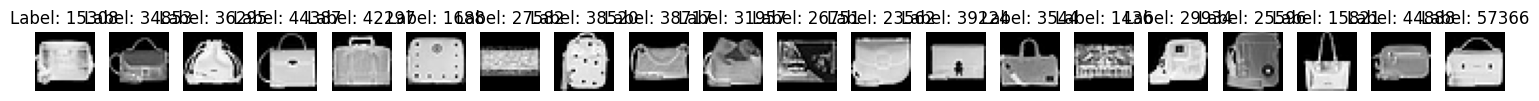

In [52]:
display_random_images(imgs_8, eights, num_images=20)

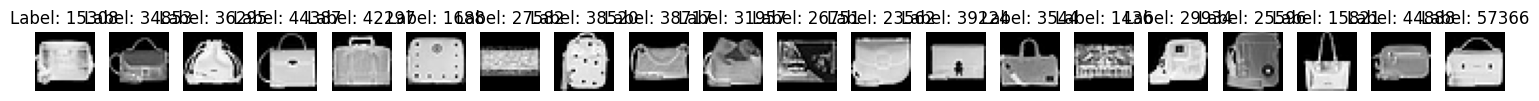

In [ ]:
display_random_images(imgs_8, eights, num_images=20)

In [40]:
imgs_8.shape

(6000, 784)

In [49]:
nines = []
for index in range(len(y_train)) :
  if y_train[index] == 9 :
    nines.append(index)

len(nines)

6000

In [50]:

images = [X_train[i] for i in nines]
len(images)

6000

In [51]:
import numpy as np
imgs_9 = np.array(images)

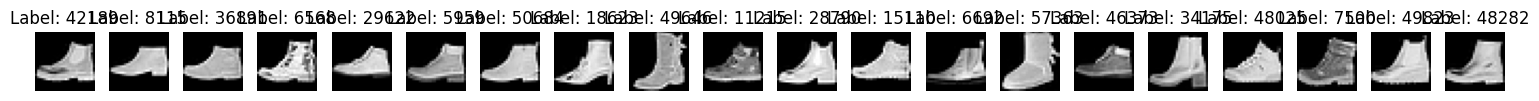

In [53]:
display_random_images(imgs_9, nines, num_images=20)

In [67]:

eights_tens = torch.tensor(imgs_8)
eights_tens.shape

torch.Size([6000, 784])

In [68]:

nines_tens = torch.tensor(imgs_9)
nines_tens.shape

torch.Size([6000, 784])

In [69]:
eights_tens = eights_tens.float()/255
nines_tens = nines_tens.float()/255

In [72]:
from fastai.vision.all import *
train_x = torch.cat([eights_tens, nines_tens]).view(-1, 28*28)
train_x.shape

torch.Size([12000, 784])

In [73]:
train_y = tensor([8]*len(eights) + [9]*len(nines)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12000, 784]), torch.Size([12000, 1]))

In [81]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([8]))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [75]:
y.shape


torch.Size([1])

In [79]:
y[:10]

tensor([8])

In [82]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [83]:
weights = init_params((28*28,1))

In [84]:
bias = init_params(1)

In [85]:
(train_x[0]*weights.T).sum() + bias

tensor([14.4564], grad_fn=<AddBackward0>)

In [86]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [88]:
linear_model = nn.Linear(28*28,1)

In [89]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [90]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [92]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [93]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [94]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [95]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [96]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [97]:
train_model(linear_model, 1)

TypeError: ignored